<a href="https://colab.research.google.com/github/reihanedva/CS-SBU-NeuralNetwork_MSc2021-projects/blob/main/ReihaneDavarzani-99422079/project4/NN4exer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Libraries and packages for text (pre-)processing 
import string
import re
import nltk
import seaborn as sns
from sklearn.model_selection import train_test_split
import torch.nn as nn
import torch
from torchtext import data
from sklearn.model_selection import train_test_split
import time
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score

In [3]:
!pip install kaggle

In [4]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"reihanedavarzani","key":"90e5ce765158c2658fcf1d7f2e76bf11"}'}

In [5]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [6]:
!pip install --upgrade --force-reinstall --no-deps kaggle

     |████████████████████████████████| 61kB 6.2MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.12-cp37-none-any.whl size=73053 sha256=f233e60e84ac95329b56a3ad2edc5aa6e2d7ce5b16d26d2d2c5c7e41e579b03d
  Stored in directory: /root/.cache/pip/wheels/a1/6a/26/d30b7499ff85a4a4593377a87ecf55f7d08af42f0de9b60303
Successfully built kaggle
  Found existing installation: kaggle 1.5.12
    Uninstalling kaggle-1.5.12:
      Successfully uninstalled kaggle-1.5.12


In [7]:
!kaggle competitions download -c nlp-getting-started

  0% 0.00/593k [00:00<?, ?B/s]
100% 593k/593k [00:00<00:00, 105MB/s]


In [8]:
!ls

kaggle.json  nlp-getting-started.zip  sample_data


In [9]:
import zipfile
zip_ref = zipfile.ZipFile('nlp-getting-started.zip', 'r')
zip_ref.extractall('files')
zip_ref.close()


In [10]:
!ls

files  kaggle.json  nlp-getting-started.zip  sample_data


In [11]:
train_data = pd.read_csv('/content/files/train.csv',encoding = 'utf8')
train_data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [ ]:
test_data = pd.read_csv('/content/files/test.csv',encoding = 'utf8')
test_data.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


# ***`Preprocessing`***

## ***` Lower case`***

In [ ]:
train_data["text_clean"] = train_data["text"].apply(lambda x: x.lower())
display(train_data.head())

,id,keyword,location,text,target,text_clean
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,our deeds are the reason of this #earthquake m...
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask. canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,all residents asked to 'shelter in place' are ...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,"13,000 people receive #wildfires evacuation or..."
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,just got sent this photo from ruby #alaska as ...


In [ ]:
test_data["text_clean"] = test_data["text"].apply(lambda x: x.lower())
display(test_data.head())

,id,keyword,location,text,text_clean
0,0,NaN,NaN,Just happened a terrible car crash,just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s...","heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are...","there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires,apocalypse lighting. #spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan,typhoon soudelor kills 28 in china and taiwan


## ***`contractions`***

In [ ]:
# Intall the contractions package - https://github.com/kootenpv/contractions
!pip install contractions

In [ ]:
import contractions

In [ ]:
train_data["text_clean"] = train_data["text_clean"].apply(lambda x: contractions.fix(x))

#check
print(train_data["text"][67])
print(train_data["text_clean"][67])

'I can't have kids cuz I got in a bicycle accident &amp; split my testicles. it's impossible for me to have kids' MICHAEL YOU ARE THE FATHER
'i cannot have kids cuz i got in a bicycle accident &amp; split my testicles. it is impossible for me to have kids' michael you are the father


In [ ]:
test_data["text_clean"] = test_data["text_clean"].apply(lambda x: contractions.fix(x))

## ***`Remove URLs`***

In [ ]:
def remove_URL(text):
    return re.sub(r"https?://\S+|www\.\S+", "", text)

In [ ]:
# remove urls from the text
train_data["text_clean"] = train_data["text_clean"].apply(lambda x: remove_URL(x))

#check
print(train_data["text"][31])
print(train_data["text_clean"][31])

@bbcmtd Wholesale Markets ablaze http://t.co/lHYXEOHY6C
@bbcmtd wholesale markets ablaze 


In [ ]:
test_data["text_clean"] = test_data["text_clean"].apply(lambda x: remove_URL(x))

## ***`Remove HTML tags`***

In [ ]:
def remove_html(text):
    html = re.compile(r"<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});")
    return re.sub(html, "", text)

In [ ]:
# remove html from the text
train_data["text_clean"] = train_data["text_clean"].apply(lambda x: remove_html(x))

#check
print(train_data["text"][62])
print(train_data["text_clean"][62])

Rene Ablaze &amp; Jacinta - Secret 2k13 (Fallen Skies Edit) - Mar 30 2013  https://t.co/7MLMsUzV1Z
rene ablaze  jacinta - secret 2k13 (fallen skies edit) - mar 30 2013  


In [ ]:
test_data["text_clean"] = test_data["text_clean"].apply(lambda x: remove_html(x))

## ***`Remove Non-ASCI`***

In [ ]:
def remove_non_ascii(text):
    return re.sub(r'[^\x00-\x7f]',r'', text) # or ''.join([x for x in text if x in string.printable]) 

In [ ]:
train_data["text_clean"] = train_data["text_clean"].apply(lambda x: remove_non_ascii(x))

# double
print(train_data["text"][38])
print(train_data["text_clean"][38])

Barbados #Bridgetown JAMAICA ÛÒ Two cars set ablaze: SANTA CRUZ ÛÓ Head of the St Elizabeth Police Superintende...  http://t.co/wDUEaj8Q4J
barbados #bridgetown jamaica  two cars set ablaze: santa cruz  head of the st elizabeth police superintende...  


In [ ]:
test_data["text_clean"] = test_data["text_clean"].apply(lambda x: remove_non_ascii(x))

## ***`Remove special characters`***

In [ ]:
def remove_special_characters(text):
    emoji_pattern = re.compile(
        '['
        u'\U0001F600-\U0001F64F'  # emoticons
        u'\U0001F300-\U0001F5FF'  # symbols & pictographs
        u'\U0001F680-\U0001F6FF'  # transport & map symbols
        u'\U0001F1E0-\U0001F1FF'  # flags (iOS)
        u'\U00002702-\U000027B0'
        u'\U000024C2-\U0001F251'
        ']+',
        flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [ ]:
train_data["text_clean"] = train_data["text_clean"].apply(lambda x: remove_special_characters(x))

#check
print(train_data["text"][143])
print(train_data["text_clean"][143])
print(train_data["text"][189])
print(train_data["text_clean"][189])

Horrible Accident  Man Died In Wings of Airplane (29-07-2015) http://t.co/i7kZtevb2v
horrible accident  man died in wings of airplane (29-07-2015) 
EMS1: NY EMTs petition for $17 per hour Û÷minimum wageÛª http://t.co/4oa6SWlxmR #ems #paramedics #ambulance
ems1: ny emts petition for $17 per hour minimum wage  #ems #paramedics #ambulance


In [ ]:
test_data["text_clean"] = test_data["text_clean"].apply(lambda x: remove_special_characters(x))

## ***`Remove punctuations`***

In [ ]:
def remove_punct(text):
#     return re.sub(r'[]!"$%&\'()*+,./:;=#@?[\\^_`{|}~-]+', "", text)
    return text.translate(str.maketrans('', '', string.punctuation))

In [ ]:
# remove punctuations from the text
train_data["text_clean"] = train_data["text_clean"].apply(lambda x: remove_punct(x))

#check
print(train_data["text"][5])
print(train_data["text_clean"][5])

#RockyFire Update => California Hwy. 20 closed in both directions due to Lake County fire - #CAfire #wildfires
rockyfire update  california hwy 20 closed in both directions due to lake county fire  cafire wildfires


In [ ]:
test_data["text_clean"] = test_data["text_clean"].apply(lambda x: remove_punct(x))

## ***`Tokenization`***

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
# Tokenizing the tweet base texts.
from nltk.tokenize import word_tokenize

train_data['tokenized'] = train_data['text_clean'].apply(word_tokenize)
train_data.head()

,id,keyword,location,text,target,text_clean,tokenized
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,our deeds are the reason of this #earthquake m...,"[our, deeds, are, the, reason, of, this, #, ea..."
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask. canada,"[forest, fire, near, la, ronge, sask, ., canada]"
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,all residents asked to 'shelter in place' are ...,"[all, residents, asked, to, 'shelter, in, plac..."
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,"13,000 people receive #wildfires evacuation or...","[13,000, people, receive, #, wildfires, evacua..."
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,just got sent this photo from ruby #alaska as ...,"[just, got, sent, this, photo, from, ruby, #, ..."


In [ ]:
test_data['tokenized'] = test_data['text_clean'].apply(word_tokenize)

## ***`Remove Stop Words`***

In [ ]:
# Removing stopwords.
nltk.download("stopwords")
from nltk.corpus import stopwords
stop = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
train_data['stopwords_removed'] = train_data['tokenized'].apply(lambda x: [word for word in x if word not in stop])
train_data.head()

,id,keyword,location,text,target,text_clean,tokenized,stopwords_removed
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,our deeds are the reason of this #earthquake m...,"[our, deeds, are, the, reason, of, this, #, ea...","[deeds, reason, #, earthquake, may, allah, for..."
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask. canada,"[forest, fire, near, la, ronge, sask, ., canada]","[forest, fire, near, la, ronge, sask, ., canada]"
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,all residents asked to 'shelter in place' are ...,"[all, residents, asked, to, 'shelter, in, plac...","[residents, asked, 'shelter, place, ', notifie..."
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,"13,000 people receive #wildfires evacuation or...","[13,000, people, receive, #, wildfires, evacua...","[13,000, people, receive, #, wildfires, evacua..."
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,just got sent this photo from ruby #alaska as ...,"[just, got, sent, this, photo, from, ruby, #, ...","[got, sent, photo, ruby, #, alaska, smoke, #, ..."


In [ ]:
test_data['stopwords_removed'] = test_data['tokenized'].apply(lambda x: [word for word in x if word not in stop])

## ***`Stemming`***

In [ ]:
from nltk.stem import LancasterStemmer

def lancaster_stemmer(text):
    stemmer = nltk.LancasterStemmer()
    stems = [stemmer.stem(i) for i in text]
    return stems

In [ ]:
train_data['lancaster_stemmer'] = train_data['stopwords_removed'].apply(lambda x: lancaster_stemmer(x))
train_data.head()

,id,keyword,location,text,target,text_clean,tokenized,stopwords_removed,lancaster_stemmer
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,our deeds are the reason of this #earthquake m...,"[our, deeds, are, the, reason, of, this, #, ea...","[deeds, reason, #, earthquake, may, allah, for...","[dee, reason, #, earthquak, may, allah, forg, us]"
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask. canada,"[forest, fire, near, la, ronge, sask, ., canada]","[forest, fire, near, la, ronge, sask, ., canada]","[forest, fir, near, la, rong, sask, ., canad]"
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,all residents asked to 'shelter in place' are ...,"[all, residents, asked, to, 'shelter, in, plac...","[residents, asked, 'shelter, place, ', notifie...","[resid, ask, 'shelter, plac, ', not, off, ., e..."
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,"13,000 people receive #wildfires evacuation or...","[13,000, people, receive, #, wildfires, evacua...","[13,000, people, receive, #, wildfires, evacua...","[13,000, peopl, receiv, #, wildfir, evacu, ord..."
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,just got sent this photo from ruby #alaska as ...,"[just, got, sent, this, photo, from, ruby, #, ...","[got, sent, photo, ruby, #, alaska, smoke, #, ...","[got, sent, photo, ruby, #, alask, smok, #, wi..."


In [ ]:
test_data['lancaster_stemmer'] = test_data['stopwords_removed'].apply(lambda x: lancaster_stemmer(x))

## ***`Part of Speech Tagging (POS Tagging)`***

In [ ]:
nltk.download('brown')

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!


True

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
from nltk.corpus import wordnet
from nltk.corpus import brown

wordnet_map = {"N":wordnet.NOUN, 
               "V":wordnet.VERB, 
               "J":wordnet.ADJ, 
               "R":wordnet.ADV
              }   
train_sents = brown.tagged_sents(categories='news')
t0 = nltk.DefaultTagger('NN')
t1 = nltk.UnigramTagger(train_sents, backoff=t0)
t2 = nltk.BigramTagger(train_sents, backoff=t1)
def pos_tag_wordnet(text, pos_tag_type="pos_tag"):
    pos_tagged_text = t2.tag(text)
    # map the pos tagging output with wordnet output 
    pos_tagged_text = [(word, wordnet_map.get(pos_tag[0])) if pos_tag[0] in wordnet_map.keys() else (word, wordnet.NOUN) for (word, pos_tag) in pos_tagged_text ]
    return pos_tagged_text

In [ ]:
train_data['combined_postag_wnet'] = train_data['stopwords_removed'].apply(lambda x: pos_tag_wordnet(x))
train_data.head()


,id,keyword,location,text,target,text_clean,tokenized,stopwords_removed,lancaster_stemmer,combined_postag_wnet
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,our deeds are the reason of this #earthquake m...,"[our, deeds, are, the, reason, of, this, #, ea...","[deeds, reason, #, earthquake, may, allah, for...","[dee, reason, #, earthquak, may, allah, forg, us]","[(deeds, n), (reason, n), (#, n), (earthquake,..."
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask. canada,"[forest, fire, near, la, ronge, sask, ., canada]","[forest, fire, near, la, ronge, sask, ., canada]","[forest, fir, near, la, rong, sask, ., canad]","[(forest, n), (fire, n), (near, n), (la, n), (..."
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,all residents asked to 'shelter in place' are ...,"[all, residents, asked, to, 'shelter, in, plac...","[residents, asked, 'shelter, place, ', notifie...","[resid, ask, 'shelter, plac, ', not, off, ., e...","[(residents, n), (asked, v), ('shelter, n), (p..."
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,"13,000 people receive #wildfires evacuation or...","[13,000, people, receive, #, wildfires, evacua...","[13,000, people, receive, #, wildfires, evacua...","[13,000, peopl, receiv, #, wildfir, evacu, ord...","[(13,000, n), (people, n), (receive, v), (#, n..."
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,just got sent this photo from ruby #alaska as ...,"[just, got, sent, this, photo, from, ruby, #, ...","[got, sent, photo, ruby, #, alaska, smoke, #, ...","[got, sent, photo, ruby, #, alask, smok, #, wi...","[(got, v), (sent, v), (photo, n), (ruby, n), (..."


In [ ]:
pos_tag_wordnet(train_data['stopwords_removed'][2])

[('residents', 'n'),
 ('asked', 'v'),
 ("'shelter", 'n'),
 ('place', 'n'),
 ("'", 'n'),
 ('notified', 'n'),
 ('officers', 'n'),
 ('.', 'n'),
 ('evacuation', 'n'),
 ('shelter', 'n'),
 ('place', 'n'),
 ('orders', 'n'),
 ('expected', 'v')]

In [ ]:
test_data['combined_postag_wnet'] = test_data['stopwords_removed'].apply(lambda x: pos_tag_wordnet(x))


In [ ]:
from nltk.stem import WordNetLemmatizer

def lemmatize_word(text):
    lemmatizer = WordNetLemmatizer()
    lemma = [lemmatizer.lemmatize(word, tag) for word, tag in text]
    return lemma

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
# Test without POS Tagging
lemmatizer = WordNetLemmatizer()

train_data['lemmatize_word_wo_pos'] = train_data['stopwords_removed'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])
train_data['lemmatize_word_wo_pos'] = train_data['lemmatize_word_wo_pos'].apply(lambda x: [word for word in x if word not in stop])
train_data.head()

,id,keyword,location,text,target,text_clean,tokenized,stopwords_removed,lancaster_stemmer,combined_postag_wnet,lemmatize_word_wo_pos
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,our deeds are the reason of this #earthquake m...,"[our, deeds, are, the, reason, of, this, #, ea...","[deeds, reason, #, earthquake, may, allah, for...","[dee, reason, #, earthquak, may, allah, forg, us]","[(deeds, n), (reason, n), (#, n), (earthquake,...","[deed, reason, #, earthquake, may, allah, forg..."
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask. canada,"[forest, fire, near, la, ronge, sask, ., canada]","[forest, fire, near, la, ronge, sask, ., canada]","[forest, fir, near, la, rong, sask, ., canad]","[(forest, n), (fire, n), (near, n), (la, n), (...","[forest, fire, near, la, ronge, sask, ., canada]"
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,all residents asked to 'shelter in place' are ...,"[all, residents, asked, to, 'shelter, in, plac...","[residents, asked, 'shelter, place, ', notifie...","[resid, ask, 'shelter, plac, ', not, off, ., e...","[(residents, n), (asked, v), ('shelter, n), (p...","[resident, asked, 'shelter, place, ', notified..."
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,"13,000 people receive #wildfires evacuation or...","[13,000, people, receive, #, wildfires, evacua...","[13,000, people, receive, #, wildfires, evacua...","[13,000, peopl, receiv, #, wildfir, evacu, ord...","[(13,000, n), (people, n), (receive, v), (#, n...","[13,000, people, receive, #, wildfire, evacuat..."
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,just got sent this photo from ruby #alaska as ...,"[just, got, sent, this, photo, from, ruby, #, ...","[got, sent, photo, ruby, #, alaska, smoke, #, ...","[got, sent, photo, ruby, #, alask, smok, #, wi...","[(got, v), (sent, v), (photo, n), (ruby, n), (...","[got, sent, photo, ruby, #, alaska, smoke, #, ..."


In [ ]:
test_data['lemmatize_word_wo_pos'] = test_data['stopwords_removed'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])
test_data['lemmatize_word_wo_pos'] = test_data['lemmatize_word_wo_pos'].apply(lambda x: [word for word in x if word not in stop])

### ***`Lemmatization with POS Tagging`***


In [ ]:
lemmatizer = WordNetLemmatizer()

train_data['lemmatize_word_w_pos'] = train_data['combined_postag_wnet'].apply(lambda x: lemmatize_word(x))
train_data['lemmatize_word_w_pos'] = train_data['lemmatize_word_w_pos'].apply(lambda x: [word for word in x if word not in stop]) # double check to remove stop words
train_data['lemmatize_text'] = [' '.join(map(str, l)) for l in train_data['lemmatize_word_w_pos']] # join back to text

train_data.head()

,id,keyword,location,text,target,text_clean,tokenized,stopwords_removed,lancaster_stemmer,combined_postag_wnet,lemmatize_word_wo_pos,lemmatize_word_w_pos,lemmatize_text
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,our deeds are the reason of this #earthquake m...,"[our, deeds, are, the, reason, of, this, #, ea...","[deeds, reason, #, earthquake, may, allah, for...","[dee, reason, #, earthquak, may, allah, forg, us]","[(deeds, n), (reason, n), (#, n), (earthquake,...","[deed, reason, #, earthquake, may, allah, forg...","[deed, reason, #, earthquake, may, allah, forg...",deed reason # earthquake may allah forgive u
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask. canada,"[forest, fire, near, la, ronge, sask, ., canada]","[forest, fire, near, la, ronge, sask, ., canada]","[forest, fir, near, la, rong, sask, ., canad]","[(forest, n), (fire, n), (near, n), (la, n), (...","[forest, fire, near, la, ronge, sask, ., canada]","[forest, fire, near, la, ronge, sask, ., canada]",forest fire near la ronge sask . canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,all residents asked to 'shelter in place' are ...,"[all, residents, asked, to, 'shelter, in, plac...","[residents, asked, 'shelter, place, ', notifie...","[resid, ask, 'shelter, plac, ', not, off, ., e...","[(residents, n), (asked, v), ('shelter, n), (p...","[resident, asked, 'shelter, place, ', notified...","[resident, ask, 'shelter, place, ', notified, ...",resident ask 'shelter place ' notified officer...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,"13,000 people receive #wildfires evacuation or...","[13,000, people, receive, #, wildfires, evacua...","[13,000, people, receive, #, wildfires, evacua...","[13,000, peopl, receiv, #, wildfir, evacu, ord...","[(13,000, n), (people, n), (receive, v), (#, n...","[13,000, people, receive, #, wildfire, evacuat...","[13,000, people, receive, #, wildfire, evacuat...","13,000 people receive # wildfire evacuation or..."
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,just got sent this photo from ruby #alaska as ...,"[just, got, sent, this, photo, from, ruby, #, ...","[got, sent, photo, ruby, #, alaska, smoke, #, ...","[got, sent, photo, ruby, #, alask, smok, #, wi...","[(got, v), (sent, v), (photo, n), (ruby, n), (...","[got, sent, photo, ruby, #, alaska, smoke, #, ...","[get, send, photo, ruby, #, alaska, smoke, #, ...",get send photo ruby # alaska smoke # wildfire ...


In [ ]:
print(train_data["text"][8])
print(train_data["combined_postag_wnet"][8])
print(train_data["lemmatize_word_wo_pos"][8])
print(train_data["lemmatize_word_w_pos"][8])

There's an emergency evacuation happening now in the building across the street
[('emergency', 'n'), ('evacuation', 'n'), ('happening', 'v'), ('building', 'n'), ('across', 'n'), ('street', 'n')]
['emergency', 'evacuation', 'happening', 'building', 'across', 'street']
['emergency', 'evacuation', 'happen', 'building', 'across', 'street']


In [ ]:
test_data['lemmatize_word_w_pos'] = test_data['combined_postag_wnet'].apply(lambda x: lemmatize_word(x))
test_data['lemmatize_word_w_pos'] = test_data['lemmatize_word_w_pos'].apply(lambda x: [word for word in x if word not in stop]) # double check to remove stop words
test_data['lemmatize_text'] = [' '.join(map(str, l)) for l in test_data['lemmatize_word_w_pos']] # join back to text

In [ ]:
test_data.head(2)

,id,keyword,location,text,text_clean,tokenized,stopwords_removed,lancaster_stemmer,combined_postag_wnet,lemmatize_word_wo_pos,lemmatize_word_w_pos,lemmatize_text
0,0,NaN,NaN,Just happened a terrible car crash,just happened a terrible car crash,"[just, happened, a, terrible, car, crash]","[happened, terrible, car, crash]","[hap, terr, car, crash]","[(happened, v), (terrible, n), (car, n), (cras...","[happened, terrible, car, crash]","[happen, terrible, car, crash]",happen terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s...",heard about earthquake is different cities sta...,"[heard, about, earthquake, is, different, citi...","[heard, earthquake, different, cities, stay, s...","[heard, earthquak, diff, city, stay, saf, ever...","[(heard, v), (earthquake, n), (different, a), ...","[heard, earthquake, different, city, stay, saf...","[hear, earthquake, different, city, stay, safe...",hear earthquake different city stay safe everyone


# ***`Text to vector`***

In [ ]:
!kaggle datasets download -d danielwillgeorge/glove6b100dtxt

 90% 118M/131M [00:00<00:00, 226MB/s] 
100% 131M/131M [00:00<00:00, 220MB/s]


In [ ]:
!ls

files  glove6b100dtxt.zip  kaggle.json	nlp-getting-started.zip  sample_data


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('glove6b100dtxt.zip', 'r')
zip_ref.extractall('files2')
zip_ref.close()


In [ ]:
!ls

files	glove6b100dtxt.zip  nlp-getting-started.zip
files2	kaggle.json	    sample_data


In [ ]:
embeddings_index = {}
with open('/content/files2/glove.6B.100d.txt','r',encoding = 'utf8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.array(values[1:]).astype(np.float)
        embeddings_index[word] = coefs
        
print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


In [ ]:
word2idx = {}
new_embedding_index = {}

In [ ]:
X_train, X_valid = train_test_split(train_data,test_size=0.2)

In [ ]:
len(X_train)

6090

In [ ]:
test_id = test_data['id']

In [ ]:
train_X_list = []
index = 1

embed_keys = embeddings_index.keys()
for x in X_train['lemmatize_text']:
        list1 = x.split(' ')
        new_list = []
        for i in list1:
            if((i in embed_keys)  and (i not in word2idx.keys())):
                new_embedding_index[index] = embeddings_index[i]
                word2idx[i] = index
                new_list.append(index)
                index=index+1   
                
            elif(i not in word2idx.keys()):
                new_embedding_index[index] = np.random.normal(scale=0.4, size=(50, )).astype(np.float)
                word2idx[i] = index
                new_list.append(index)
                index=index+1   

            else:
                new_list.append(word2idx[i])

        train_X_list.append(new_list)

In [ ]:
index

13549

In [ ]:
len(word2idx)

13548

In [ ]:
valid_X_list = []
index = len(word2idx)+1

embed_keys = embeddings_index.keys()
for x in X_valid['lemmatize_text']:
        list1 = x.split(' ')
        new_list = []
        for i in list1:
            if((i in embed_keys)  and (i not in word2idx.keys())):
                new_embedding_index[index] = embeddings_index[i]
                word2idx[i] = index
                new_list.append(index)
                index=index+1   
                
            elif(i not in word2idx.keys()):
                new_embedding_index[index] = np.random.normal(scale=0.4, size=(50, )).astype(np.float)
                word2idx[i] = index
                new_list.append(index)
                index=index+1   

            else:
                new_list.append(word2idx[i])

        valid_X_list.append(new_list)

In [ ]:
test_X_list = []
index = 13549

embed_keys = embeddings_index.keys()
for x in test_data['lemmatize_text']:
        list1 = x.split(' ')
        new_list = []
        for i in list1:
            if((i in embed_keys)  and (i not in word2idx.keys())):
                new_embedding_index[index] = embeddings_index[i]
                word2idx[i] = index
                new_list.append(index)
                index=index+1   
                
            elif(i not in word2idx.keys()):
                new_embedding_index[index] = np.random.normal(scale=0.4, size=(50, )).astype(np.float)
                word2idx[i] = index
                new_list.append(index)
                index=index+1   

            else:
                new_list.append(word2idx[i])

        test_X_list.append(new_list)

In [ ]:
print(len(new_embedding_index))

17702


In [ ]:
max(map(len, train_X_list)) 

24

In [ ]:
max(map(len, test_X_list)) 

22

In [ ]:
def pad_features(reviews_int, seq_length):
    features = np.zeros((len(reviews_int), seq_length), dtype = int)
    for i, review in enumerate(reviews_int):
        review_len = len(review)
        
        if review_len <= seq_length:
            zeroes = list(np.zeros(seq_length-review_len))
            new = zeroes+review 
        
        elif review_len > seq_length:
            new = review[0:seq_length]
        
        features[i,:] = np.array(new)
    
    return features

In [ ]:
print(len(train_X_list)) 

6090


In [ ]:
train_X_list = pad_features(train_X_list,30)

#for i in range(3):
#    extra_list =[np.array(np.zeros(30).astype(int))]
#    train_X_list =  np.append(train_X_list,extra_list, axis=0)
    
print(len(train_X_list)) 

6090


In [ ]:
max(map(len, train_X_list)) 

30

In [ ]:
train_y_list=[]
for i in X_train['target']:
    train_y_list.append(i)
    
#for i in range(3):
#    train_y_list.append(0)
#print(len(train_y_list))

train_y_list=np.array(train_y_list)

In [ ]:
test_X_list = pad_features(test_X_list,30)


#extra_list =[np.array(np.zeros(30).astype(int))]


#test_X_list =  np.append(test_X_list,extra_list, axis=0)

In [ ]:
valid_X_list = pad_features(valid_X_list,30)


#extra_list =[np.array(np.zeros(30).astype(int))]


#valid_X_list =  np.append(valid_X_list,extra_list, axis=0)

In [ ]:
new_embedding_index[0] = np.array(np.zeros(100)).astype(np.float)

# ***`Classify`***

In [ ]:
import torch
from torch.utils.data import DataLoader, TensorDataset

train_data = TensorDataset(torch.from_numpy(train_X_list),torch.from_numpy(train_y_list))


batch_size = 16
train_loader = DataLoader(train_data, batch_size = batch_size, drop_last = True)

In [ ]:
import torch.nn as nn

class BiLSTM(nn.Module):
    
    def __init__(self,weights_matrix, output_size, hidden_dim,hidden_dim2, n_layers, drop_prob=0.5):
        super(BiLSTM, self).__init__()
        
        self.output_size = output_size
        self.n_layers = n_layers
        self.hidden_dim = hidden_dim
        
        num_embeddings, embedding_dim = weights_matrix.shape
        self.embedding = nn.Embedding(num_embeddings, embedding_dim)
       
        self.embedding.weight = nn.Parameter(weights_matrix)
        
        self.lstm = nn.LSTM(embedding_dim,hidden_dim, n_layers, dropout = drop_prob, bidirectional=True, batch_first=True)
        
        
        
        self.dropout = nn.Dropout(0.3)
        
        self.fullyconnect1 = nn.Linear(hidden_dim,hidden_dim2)
        
        self.fullyconnect2 = nn.Linear(hidden_dim2, output_size)

        
        self.sig = nn.Sigmoid()
        
    def forward(self, x, hidden):
        batch_size = x.size(0)
         
        embeds = self.embedding(x)
        lstm_outs, hidden = self.lstm(embeds, hidden)
        
        lstm_outs = lstm_outs.contiguous().view(-1, self.hidden_dim)
        
        
        out = self.dropout(lstm_outs)
        out = self.fullyconnect1(out)
        out = self.dropout(out)
        out = self.fullyconnect2(out)
        sig_out = self.sig(out)
        
        sig_out = sig_out.view(batch_size, -1)
        sig_out = sig_out[:, -1]
        
        return sig_out, hidden
    
    def init_hidden(self, batch_size,train_on_gpu=False):
        
        weight = next(self.parameters()).data
            
        if (train_on_gpu):
            hidden = (weight.new(self.n_layers*2, batch_size, self.hidden_dim).zero_().cuda(),
                  weight.new(self.n_layers*2, batch_size, self.hidden_dim).zero_().cuda())
        else:
            hidden = (weight.new(self.n_layers*2, batch_size, self.hidden_dim).zero_(),
                      weight.new(self.n_layers*2, batch_size, self.hidden_dim).zero_())
        
        return hidden 

In [ ]:
vals = np.array(list(new_embedding_index.values()))

In [ ]:
valss = [None] * 17703
for x in range(17703):
  valss[x] = torch.from_numpy(vals[x])

In [ ]:
temp = {}
for x in range(17703):
  if valss[x].shape != torch.Size([100]):
    temp = 100 - valss[x].shape[0]
    a = np.array(np.zeros(temp).astype(int))
    a = torch.from_numpy(a)
    valss[x] = torch.cat((valss[x], a))

In [ ]:
vals = torch.stack(valss)

In [ ]:

output_size = 1
hidden_dim = 200
hidden_dim2 = 50
n_layers = 2

net = BiLSTM(vals, output_size, hidden_dim,hidden_dim2, n_layers)

print(net)

BiLSTM(
  (embedding): Embedding(17703, 100)
  (lstm): LSTM(100, 200, num_layers=2, batch_first=True, dropout=0.5, bidirectional=True)
  (dropout): Dropout(p=0.3, inplace=False)
  (fullyconnect1): Linear(in_features=200, out_features=50, bias=True)
  (fullyconnect2): Linear(in_features=50, out_features=1, bias=True)
  (sig): Sigmoid()
)


In [ ]:
train_on_gpu = True

In [ ]:
lr=0.001

criterion = nn.BCELoss()
optimizer = torch.optim.Adam(net.parameters(), lr=lr)


# training params

epochs =20

counter = 0
print_every = 64
clip=5 # gradient clipping


In [ ]:
net = net.float()

In [ ]:
net.train()

BiLSTM(
  (embedding): Embedding(17703, 100)
  (lstm): LSTM(100, 200, num_layers=2, batch_first=True, dropout=0.5, bidirectional=True)
  (dropout): Dropout(p=0.3, inplace=False)
  (fullyconnect1): Linear(in_features=200, out_features=50, bias=True)
  (fullyconnect2): Linear(in_features=50, out_features=1, bias=True)
  (sig): Sigmoid()
)

In [ ]:
Loss = []
trainLoss = []
trainPred =[]
for e in range(epochs):
    # initialize hidden state
    h = net.init_hidden(batch_size)

    # batch loop
    for inputs, labels in train_loader:
        counter += 1


        # Creating new variables for the hidden state, otherwise
        # we'd backprop through the entire training history
        h = tuple([each.data for each in h])

        # zero accumulated gradients
        net.zero_grad()

        # get the output from the model
        inputs = inputs.type(torch.LongTensor)
        output, h = net(inputs, h)
        # calculate the loss and perform backprop
        loss = criterion(output.squeeze(), labels.float())
        trainPred.append(torch.round(output.squeeze()))
        loss.backward()
        
        nn.utils.clip_grad_norm_(net.parameters(), clip)
        optimizer.step()

        trainLoss.append(loss.item())

        
    
    Loss.append(loss.item())   
    print("Epoch: {}/{}...".format(e+1, epochs),
          "Loss: {:.6f}...".format(loss.item()))

Epoch: 1/20... Loss: 0.439255...
Epoch: 2/20... Loss: 0.254023...
Epoch: 3/20... Loss: 0.101576...
Epoch: 4/20... Loss: 0.040004...
Epoch: 5/20... Loss: 0.020522...
Epoch: 6/20... Loss: 0.002563...
Epoch: 7/20... Loss: 0.003133...
Epoch: 8/20... Loss: 0.001923...
Epoch: 9/20... Loss: 0.000708...
Epoch: 10/20... Loss: 0.000603...
Epoch: 11/20... Loss: 0.000590...
Epoch: 12/20... Loss: 0.000253...
Epoch: 13/20... Loss: 0.000067...
Epoch: 14/20... Loss: 0.000477...
Epoch: 15/20... Loss: 0.000136...
Epoch: 16/20... Loss: 0.000035...
Epoch: 17/20... Loss: 0.000029...
Epoch: 18/20... Loss: 0.004948...
Epoch: 19/20... Loss: 0.000039...
Epoch: 20/20... Loss: 0.000034...


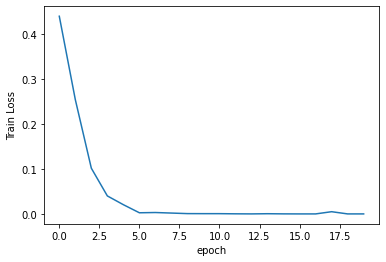

In [ ]:
import matplotlib.pyplot as plt

plt.plot(Loss)
plt.xlabel('epoch')
plt.ylabel('Train Loss')
plt.show()

In [ ]:
valid_data = torch.from_numpy(valid_X_list)

valid_loader = DataLoader(valid_data,batch_size=batch_size, drop_last = True)

h = net.init_hidden(batch_size)

pred = []

net.eval()

for inputs in valid_loader:
    #print(inputs)
    # Creating new variables for the hidden state, otherwise
    # we'd backprop through the entire training history
    h = tuple([each.data for each in h])

    # get predicted outputs
    inputs = inputs.type(torch.LongTensor)
    
    output, h = net(inputs, h)
    
    # convert output probabilities to predicted class (0 or 1)
    pred.append(torch.round(output.squeeze()))

In [ ]:
prediction = []
for i in pred:
    prediction.append(i.tolist())

pred = []

pred = [item for sublist in prediction for item in sublist]

pred = pred[:-1]

pred = [int(i) for i in pred]
print(len(pred))

1519


In [ ]:
vt = X_valid.drop(X_valid.tail(4).index,inplace=True)

In [ ]:
output = pd.DataFrame({'actual': X_valid['target'],'predict': pred})

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
import sklearn.metrics as metrics
print(confusion_matrix(output['actual'],output['predict']))

print("Accuracy:",metrics.accuracy_score(output['actual'],output['predict']))

[[680 203]
 [189 447]]
Accuracy: 0.7419354838709677


In [ ]:
output

,actual,predict
5682,0,0
5138,0,0
7387,0,0
5894,1,1
2527,0,0
...,...,...
5437,1,1
2452,1,1
5329,0,0
1680,0,1


In [ ]:
test_data = torch.from_numpy(test_X_list)

test_loader = DataLoader(test_data,batch_size=batch_size,drop_last = True)

h = net.init_hidden(batch_size)

pred = []

net.eval()

for inputs in test_loader:

    # Creating new variables for the hidden state, otherwise
    # we'd backprop through the entire training history
    h = tuple([each.data for each in h])
    
    # get predicted outputs
    inputs = inputs.type(torch.LongTensor)
    
    output, h = net(inputs, h)
    
    # convert output probabilities to predicted class (0 or 1)
    pred.append(torch.round(output.squeeze()))

In [ ]:
prediction = []
for i in pred:
    prediction.append(i.tolist())

pred = []

pred = [item for sublist in prediction for item in sublist]

pred = pred[:-1]

pred = [int(i) for i in pred]
print(len(pred))

3247


In [ ]:
vt = test_id.drop(test_id.tail(16).index,inplace=True)

In [ ]:
len(pred)

3247

In [ ]:
output = pd.DataFrame({'id': test_id,'target': pred})

output.sort_values(["id"], axis=0, 
                 ascending=True, inplace=True)

output.to_csv('submission.csv', index=False)

In [ ]:
output

,id,target
0,0,1
1,2,0
2,3,1
3,9,1
4,11,1
...,...,...
3242,10792,0
3243,10796,1
3244,10797,0
3245,10801,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


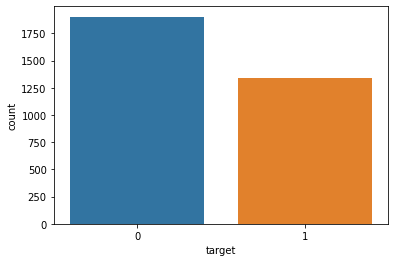

In [ ]:
sns.countplot(output["target"]);

# ***` Transformer`***

In [12]:
df =pd.read_csv('/content/files/train.csv' ,  encoding='ISO-8859-1')


In [13]:
df_tweets = df[['text','target']]

In [14]:
df_tweets.drop_duplicates(subset=['text'],keep='first',inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [16]:
train_df,eval_df = train_test_split(df_tweets,test_size = 0.01)

In [17]:
!pip install simpletransformers

     |████████████████████████████████| 225kB 26.0MB/s 
     |████████████████████████████████| 2.5MB 45.6MB/s 
     |████████████████████████████████| 266kB 45.8MB/s 
     |████████████████████████████████| 1.8MB 32.2MB/s 
     |████████████████████████████████| 3.3MB 31.0MB/s 
     |████████████████████████████████| 81kB 7.3MB/s 
     |████████████████████████████████| 51kB 6.0MB/s 
     |████████████████████████████████| 133kB 31.6MB/s 
     |████████████████████████████████| 7.8MB 27.8MB/s 
     |████████████████████████████████| 1.2MB 31.1MB/s 
     |████████████████████████████████| 901kB 35.5MB/s 
     |████████████████████████████████| 122kB 51.8MB/s 
     |████████████████████████████████| 245kB 28.0MB/s 
     |████████████████████████████████| 174kB 37.7MB/s 
     |████████████████████████████████| 102kB 8.8MB/s 
     |████████████████████████████████| 143kB 36.7MB/s 
     |████████████████████████████████| 81kB 8.5MB/s 
     |████████████████████████████████| 4.2MB 34.1MB/s 

In [18]:
!pip install --upgrade tqdm

Requirement already up-to-date: tqdm in /usr/local/lib/python3.7/dist-packages (4.61.2)


In [19]:
!pip install --upgrade simpletransformers

Requirement already up-to-date: simpletransformers in /usr/local/lib/python3.7/dist-packages (0.61.9)


In [20]:
from simpletransformers.classification import ClassificationModel


# Create a TransformerModel
model = ClassificationModel('bert', 'bert-base-cased', num_labels=2,
                            args={'reprocess_input_data': True, 'overwrite_output_dir': True}
                            ,use_cuda=False)


Some weights of the model checkpoint at bert-base-cased were not used when initializing BertForSequenceClassification: ['cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at b

In [23]:
print(model.des)

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(28996, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, element

In [27]:
train_df2 = pd.DataFrame({
    'text': train_df['text'].replace(r'\n', ' ', regex=True),
    'label': train_df['target']
})

eval_df2 = pd.DataFrame({
    'text': eval_df['text'].replace(r'\n', ' ', regex=True),
    'label': eval_df['target']
})

In [28]:
model.train_model(train_df2)

/usr/local/lib/python3.7/dist-packages/simpletransformers/classification/classification_model.py:610: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


(929, 0.46887362005732414)

In [29]:
result, model_outputs, wrong_predictions = model.eval_model(eval_df2)

/usr/local/lib/python3.7/dist-packages/simpletransformers/classification/classification_model.py:1393: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


In [30]:
print(result)
print(model_outputs)

{'mcc': 0.6533225478972492, 'tp': 27, 'tn': 36, 'fp': 6, 'fn': 7, 'auroc': 0.9292717086834734, 'auprc': 0.9226137022189955, 'eval_loss': 0.3497443050146103}
[[ 0.99231666 -1.24846399]
 [ 0.58260083 -0.87422031]
 [ 0.67287135 -0.93835038]
 [ 0.71011144 -1.0566659 ]
 [ 0.58272153 -0.90095812]
 [-1.88000655  2.30265665]
 [ 0.0649884   0.24307393]
 [-0.11774012  0.21727163]
 [ 1.16840577 -1.39262152]
 [-0.30264953  0.80445749]
 [-1.86912143  2.2941184 ]
 [-1.92041934  2.32876992]
 [ 1.20016789 -1.42202485]
 [-0.55359215  1.32218146]
 [-1.2385323   1.51344633]
 [ 1.13429475 -1.31883729]
 [ 0.88655668 -1.1864624 ]
 [-1.58782327  1.86810589]
 [ 0.80052739 -1.00773561]
 [ 1.0960902  -1.32158279]
 [-1.18524587  1.37576628]
 [-1.7409898   2.14925694]
 [-1.47596455  1.73069656]
 [-1.50335574  1.81545889]
 [ 0.59479862 -0.88504267]
 [ 0.03805507  0.30784136]
 [-1.75255418  2.06573749]
 [-1.86194682  2.32510519]
 [ 0.64773983 -1.23283434]
 [ 1.18888378 -1.39909959]
 [-1.79297996  2.30162573]
 [ 0.1

In [31]:
lst = []
for arr in model_outputs:
    lst.append(np.argmax(arr))

In [32]:
true = eval_df2['label'].tolist()
predicted = lst


In [33]:
import sklearn
mat = sklearn.metrics.confusion_matrix(true , predicted)
mat

array([[36,  6],
       [ 7, 27]])

In [34]:
print(sklearn.metrics.classification_report(true,predicted,target_names=['fake','real']))


              precision    recall  f1-score   support

        fake       0.84      0.86      0.85        42
        real       0.82      0.79      0.81        34

    accuracy                           0.83        76
   macro avg       0.83      0.83      0.83        76
weighted avg       0.83      0.83      0.83        76



In [36]:
test_df =pd.read_csv('/content/files/test.csv' ,  encoding='ISO-8859-1')

test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [37]:
final_prediction = model.predict(list(test_df.text))

In [38]:
final_prediction

(array([1, 1, 1, ..., 1, 1, 1]), array([[-0.42848954,  1.05006421],
        [-1.45686674,  1.71821368],
        [-1.32989669,  1.57863164],
        ...,
        [-1.83574474,  2.25829983],
        [-1.58679771,  1.85772681],
        [-0.49479255,  0.64183241]]))